In [ ]:
from sklearn.datasets import fetch_20newsgroups 
import string
import re
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import random
random.seed(42)
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
from pickle import dump
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from nltk.corpus import wordnet as wn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn import svm, datasets
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn import svm, datasets
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from joblib import Parallel
from joblib import delayed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Q1

In [ ]:
from google.colab import drive # Google authentication setp
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/219/ratings.csv" # Import file from Google Drive
df = pd.read_csv(path)

In [ ]:
df.head() # To view the head of dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df.tail() # To view the tail of dataset

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [ ]:
df.dtypes # To view the type of dataset

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
rows_num, columns_num = df.shape # View the shape of dataset
print(rows_num) # Print the number of rows
print(columns_num) # Print the number of columns

100836
4


In [ ]:
print(df.columns) # Print the columns of dataset

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [ ]:
userid = df["userId"].values.tolist() # Get the userId column and convert it into a list
print(type(userid))
print(userid)

movieid = df["movieId"].values.tolist() # Get the movieId column and convert it into a list
print(type(movieid))
print(movieid)

rating = df["rating"].values.tolist() # Get the rating column and convert it into a list
print(type(rating))
print(rating)

<class 'list'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
# Compute the sparsity of the movie rating dataset

import functools # Import functools for reduce()

# Get the number of unique values in userid
m = len(functools.reduce(lambda i, x: i.append(x) or i if x not in i else i, userid, [])) 
print(m) # m represents the number of users

# Get the number of unique values in movieid
n = len(functools.reduce(lambda i, x: i.append(x) or i if x not in i else i, movieid, []))
print(n) # n represents the number of movies

# Get the number of unique nonzero values in rating
rr =  len([j for j in rating if j != 0])
print(rr) # Print the numebr of valid ratings that are nonzero

# Compute the sparsity
sparsity = float(rr / (m * n))
print(sparsity)


610
9724
100836
0.016999683055613623


Q2

[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 3.0, 3.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 5.0, 3.0, 3.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 2.0, 4.0, 4.0, 5.0, 5.0, 2.0, 5.0, 4.0, 5.0, 2.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 2.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0,

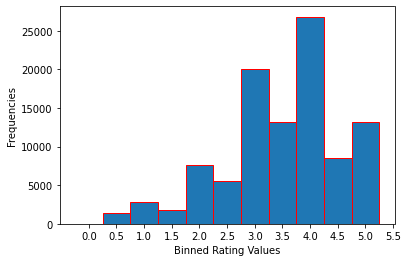

In [ ]:
# Plot the histogram showing the frequency of the rating values

x_axis = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5] # Generate the x axis
y_axis = rating # Generate the y axis
print(y_axis)
plt.hist(y_axis, x_axis, align = "left", edgecolor = "r") # Plot the histogram
plt.xticks(x_axis)
plt.xlabel("Binned Rating Values")
plt.ylabel("Frequencies")
plt.show()



Q3

[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641, 2644, 2648, 2

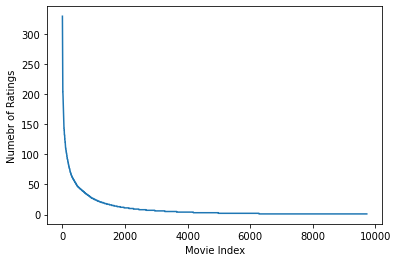

In [ ]:
import collections

# Use counter for counting the elements in movieid
print(movieid)
movieid_counter = collections.Counter(movieid)
print(movieid_counter) # Print the resulting dictionary of counting. 
print(movieid_counter.keys())
movieid_counter_values = list(movieid_counter.values()) # Convert into a list
print(movieid_counter_values)

# Sort the values of counting dictionary in descending order
movieid_counter_values.sort(reverse = True)

plt.plot(movieid_counter_values)
plt.xlabel("Movie Index")
plt.ylabel("Numebr of Ratings")
plt.show()

Q4

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

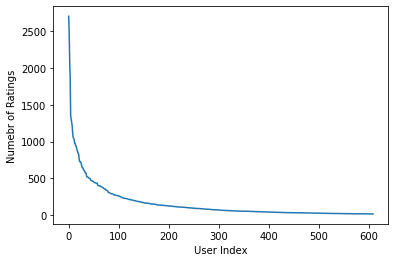

In [ ]:
import collections

# Use counter for counting the elements in userid
print(userid)
userid_counter = collections.Counter(userid)
print(userid_counter) # Print the resulting dictionary of counting. 
print(userid_counter.keys())
userid_counter_values = list(userid_counter.values()) # Convert into a list
print(userid_counter_values)

# Sort the values of counting dictionary in descending order
userid_counter_values.sort(reverse = True)

plt.plot(userid_counter_values)
plt.xlabel("User Index")
plt.ylabel("Numebr of Ratings")
plt.show()

Q6

(610, 9724)
movieId
1         0.693748
2         0.770351
3         1.091254
4         0.622449
5         0.806122
            ...   
193581    0.000000
193583    0.000000
193585    0.000000
193587    0.000000
193609    0.000000
Length: 9724, dtype: float64


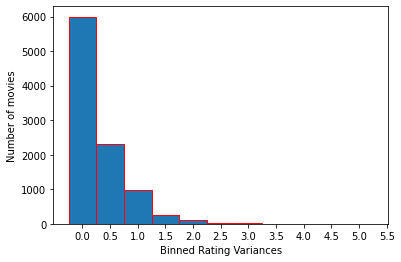

In [ ]:

# Construct the R matrix
R = df.pivot(index = 'userId', columns = 'movieId', values = 'rating')
print(R.shape)

# Plot the histogram
x_axis2 = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5] # Generate the x axis
y_axis2 = np.var(R) # Generate the y axis
print(y_axis2)
plt.hist(y_axis2, x_axis2, align = "left", edgecolor = "r") # Plot the histogram
plt.xticks(x_axis2)
plt.xlabel("Binned Rating Variances")
plt.ylabel("Number of movies")
plt.show()



Q10

In [ ]:
!pip install surprise # Install the surprise library
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import accuracy

     |████████████████████████████████| 11.8MB 5.4MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1615310 sha256=98b61082c5fc54dff3b29177f846fd40a0d92a786ae4b1aa86cce729fd514e46
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
RMSE = []
MAE = []
ks = list(range(2, 102, 2)) # k values from 2 to 100 in step sizes of 2
print(ks)

# Design a k-NN collaborative filter and evaluate its performance using 10-fold cross validation
for k in ks:
  cv = cross_validate(KNNWithMeans(k = k, sim_options = {"name":"pearson", "user_based":True}), Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5))), measures = ["RMSE", "MAE"], cv = 10)
  RMSE.append(cv["test_rmse"].mean())
  MAE.append(cv["test_mae"].mean())
  print(k)
  print(RMSE)
  print(MAE)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
2
[1.0181848248693102]
[0.785314

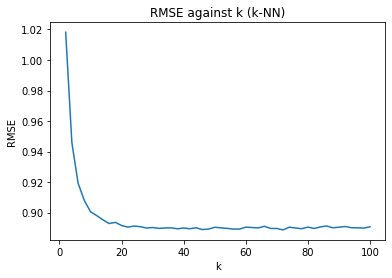

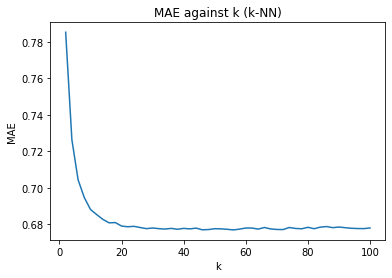

In [ ]:
# Plotting

plt.plot(ks, RMSE)
plt.title("RMSE against k (k-NN)")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(ks, MAE)
plt.title("MAE against k (k-NN)")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

Q11

k = 2 RMSE = 1.0181848248693102 MAE = 0.7853145212436723
k = 4 RMSE = 0.9457798219765634 MAE = 0.7264221572493031
k = 6 RMSE = 0.919273936172942 MAE = 0.7044015272969151
k = 8 RMSE = 0.9079845229271262 MAE = 0.6946703013978388
k = 10 RMSE = 0.900565997137919 MAE = 0.6881284008813078
k = 12 RMSE = 0.8980313432486209 MAE = 0.6853146970483432
k = 14 RMSE = 0.8952452456181351 MAE = 0.6826827657973544
k = 16 RMSE = 0.8928380571935939 MAE = 0.6808069081195305
k = 18 RMSE = 0.8935981312228449 MAE = 0.6809565479833012
k = 20 RMSE = 0.8915479525175725 MAE = 0.6790526192838339
k = 22 RMSE = 0.8904915149888616 MAE = 0.6786608765062736
k = 24 RMSE = 0.8911784790952298 MAE = 0.6788986321780105
k = 26 RMSE = 0.8907903100656481 MAE = 0.6782427445335759
k = 28 RMSE = 0.8898955079630151 MAE = 0.6776271161011951
k = 30 RMSE = 0.8902241046816679 MAE = 0.6779965107404577
k = 32 RMSE = 0.8896576354444734 MAE = 0.6776163027425209
k = 34 RMSE = 0.8899240986211637 MAE = 0.6774013835223507
k = 36 RMSE = 0.8899

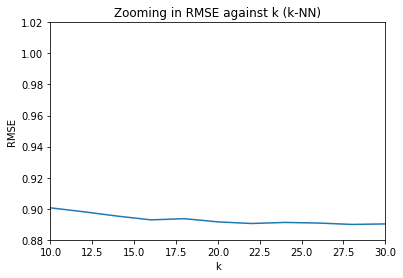

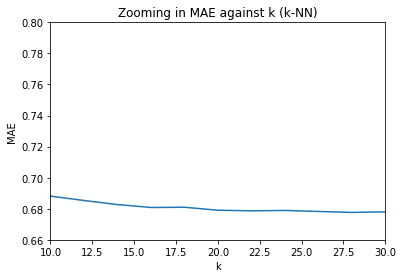

In [ ]:
# Print out k and its corresponding RMSE and MAE
for i in range(len(ks)):
  print("k = " + str(ks[i]), "RMSE = "+ str(RMSE[i]), "MAE = " + str(MAE[i]))

# Zoom in RMSE and MAE plots
plt.plot(ks, RMSE)
plt.title("Zooming in RMSE against k (k-NN)")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.axis([10, 30, 0.88, 1.02])
plt.show()

plt.plot(ks, MAE)
plt.title("Zooming in MAE against k (k-NN)")
plt.xlabel("k")
plt.ylabel("MAE")
plt.axis([10, 30, 0.66, 0.80])
plt.show()

# From the generated data and plot we can see that when k = 22, it would not result in a significant decrease in average RMSE or MAE

kmin11 = 22

Q12

In [ ]:
movie_id=df.groupby(['movieId'])['userId'].count()
print(movie_id)

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64


In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Popular movie trimming
def popular_trimming(testset): 
  testset_trim_index = movie_id[movie_id>2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a

RMSE12 = []
MAE12 = []

for k in ks:
  algo12 = KNNWithMeans(k = k, sim_options = {"name":"pearson", "user_based":True})
  rmse12 = []
  mae12 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo12.fit(trainset)
    rmse12.append(accuracy.rmse(algo12.test(popular_trimming(testset))))
    mae12.append(accuracy.mae(algo12.test(popular_trimming(testset))))

  RMSE12.append(np.mean(rmse12))
  MAE12.append(np.mean(mae12))
  print(k)
  print(RMSE12)
  print(MAE12)
  

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0154
MAE:  0.7811
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0228
MAE:  0.7882
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0142
MAE:  0.7852
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0098
MAE:  0.7812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0203
MAE:  0.7886
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0158
MAE:  0.7840
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0204
MAE:  0.7902
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0259
MAE:  0.7911
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9962
MAE:  0.7715
Computing the pearson similarity matrix...
Done computing similarity matr

KeyboardInterrupt: ignored

In [ ]:
# Plotting

plt.plot(ks, RMSE12)
plt.title("Q12 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(ks, MAE12)
plt.title("Q12 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q12 The minimum average RMSE = " + str(min(RMSE12)))

Q13

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Unpopular movie trimming
def unpopular_trimming(testset):
  testset_trim_index = movie_id[movie_id<=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a


RMSE13 = []
MAE13 = []

for k in ks:
  algo13 = KNNWithMeans(k = k, sim_options = {"name":"pearson", "user_based":True})
  rmse13 = []
  mae13 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo13.fit(trainset)
    rmse13.append(accuracy.rmse(algo13.test(unpopular_trimming(testset))))
    mae13.append(accuracy.mae(algo13.test(unpopular_trimming(testset))))

  RMSE13.append(np.mean(rmse13))
  MAE13.append(np.mean(mae13))
  print(k)
  print(RMSE13)
  print(MAE13)

In [ ]:
# Plotting

plt.plot(ks, RMSE13)
plt.title("Q13 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(ks, MAE13)
plt.title("Q13 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q13 The minimum average RMSE = " + str(min(RMSE13)))

Q14

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# High variance movie trimming
def high_variance_trimming(testset):
  testset_trim_index = movie_id[movie_id>5].index
  testset_var_index = y_axis2[y_axis2>=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index and testset[i][1] in testset_var_index:
      a.append(testset[i])
  return a


RMSE14 = []
MAE14 = []

for k in ks:
  algo14 = KNNWithMeans(k = k, sim_options = {"name":"pearson", "user_based":True})
  rmse14 = []
  mae14 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo14.fit(trainset)
    rmse14.append(accuracy.rmse(algo14.test(high_variance_trimming(testset))))
    mae14.append(accuracy.mae(algo14.test(high_variance_trimming(testset))))

  RMSE14.append(np.mean(rmse14))
  MAE14.append(np.mean(mae14))
  print(k)
  print(RMSE14)
  print(MAE14)

In [ ]:
# Plotting

plt.plot(ks, RMSE14)
plt.title("Q14 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(ks, MAE14)
plt.title("Q14 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q14 The minimum average RMSE = " + str(min(RMSE14)))

Q15

In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

trainset, testset = train_test_split(Dataset.load_from_df(df[['userId', 'movieId', 'rating']], Reader(rating_scale=(0.5, 5))), test_size=0.1)
print(KNNWithMeans(k = kmin11,sim_options={'name':'pearson', "user_based":True}).fit(trainset).test(testset))
for t in [2.5, 3, 3.5, 4]:
    y_label = []
    y_score = []
    for j in KNNWithMeans(k = kmin11,sim_options={'name':'pearson', "user_based":True}).fit(trainset).test(testset):
      y_score.append(j.est)
      if j.r_ui > t: y_label.append(1)
      else: y_label.append(0)
    fpr, tpr, _ = roc_curve(y_label, y_score)
    plot_roc(fpr, tpr)
    print("The AUC score for threshold = %f is: " % t + str(roc_auc_score(y_label, y_score)))
    plt.title('threshold = %f' % t)
    plt.show()





Q17

In [ ]:
from surprise import NMF

RMSE17 = []
MAE17 = []
kss = list(range(2, 52, 2))
print(kss)

for k in kss:
  cv = cross_validate(NMF(n_factors = k), Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5))), measures = ["RMSE", "MAE"], cv = 10)
  RMSE17.append(cv["test_rmse"].mean())
  MAE17.append(cv["test_mae"].mean())
  print(k)
  print(RMSE17)
  print(MAE17)

In [ ]:
# Plotting

plt.plot(kss, RMSE17)
plt.title("RMSE against k (NNMF)")
plt.xlabel("k")
plt.ylabel("RMSE17")
plt.show()

plt.plot(kss, MAE17)
plt.title("MAE against k (NNMF)")
plt.xlabel("k")
plt.ylabel("MAE17")
plt.show()

Q18

In [ ]:
# Print out k and its corresponding RMSE and MAE
for i in range(len(kss)):
  print("k = " + str(kss[i]), "RMSE = "+ str(RMSE17[i]), "MAE = " + str(MAE17[i]))

print("RMSE17 min k = " + str(RMSE17.index(min(RMSE17)) * 2 + 2))
print("The min RMSE17 is: " + str(min(RMSE17)))
print("MAE17 min k = " + str(MAE17.index(min(MAE17)) * 2 + 2))
print("The min MAE17 is: "+ str(min(MAE17)))

# Zoom in RMSE and MAE plots
plt.plot(kss, RMSE17)
plt.title("Zooming in RMSE against k (NNMF)")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.axis([10, 30, 0.90, 1.15])
plt.show()

plt.plot(kss, MAE17)
plt.title("Zooming in MAE against k (NNMF)")
plt.xlabel("k")
plt.ylabel("MAE")
plt.axis([10, 30, 0.65, 1.00])
plt.show()

# From the generated data and plot we can see that when k = 18, it would not result in the min value in average RMSE or MAE
kmin18 = 18 

Q19

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Popular movie trimming
def popular_trimming(testset): 
  testset_trim_index = movie_id[movie_id>2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a

RMSE19 = []
MAE19 = []

for k in kss:
  algo19 = NMF(n_factors = k)
  rmse19 = []
  mae19 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo19.fit(trainset)
    rmse19.append(accuracy.rmse(algo19.test(popular_trimming(testset))))
    mae19.append(accuracy.mae(algo19.test(popular_trimming(testset))))

  RMSE19.append(np.mean(rmse19))
  MAE19.append(np.mean(mae19))
  print(k)
  print(RMSE19)
  print(MAE19)
  

In [ ]:
# Plotting

plt.plot(kss, RMSE19)
plt.title("Q19 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE19)
plt.title("Q19 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q19 The minimum average RMSE = " + str(min(RMSE19)))

Q20

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Unpopular movie trimming
def unpopular_trimming(testset):
  testset_trim_index = movie_id[movie_id<=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a


RMSE20 = []
MAE20 = []

for k in kss:
  algo20 = NMF(n_factors = k)
  rmse20 = []
  mae20 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo20.fit(trainset)
    rmse20.append(accuracy.rmse(algo20.test(unpopular_trimming(testset))))
    mae20.append(accuracy.mae(algo20.test(unpopular_trimming(testset))))

  RMSE20.append(np.mean(rmse20))
  MAE20.append(np.mean(mae20))
  print(k)
  print(RMSE20)
  print(MAE20)

In [ ]:
# Plotting

plt.plot(kss, RMSE20)
plt.title("Q20 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE20)
plt.title("Q20 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q20 The minimum average RMSE = " + str(min(RMSE20)))

Q21

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# High variance movie trimming
def high_variance_trimming(testset):
  testset_trim_index = movie_id[movie_id>5].index
  testset_var_index = y_axis2[y_axis2>=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index and testset[i][1] in testset_var_index:
      a.append(testset[i])
  return a


RMSE21 = []
MAE21 = []

for k in kss:
  algo21 = NMF(n_factors = k)
  rmse21 = []
  mae21 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo21.fit(trainset)
    rmse21.append(accuracy.rmse(algo21.test(high_variance_trimming(testset))))
    mae21.append(accuracy.mae(algo21.test(high_variance_trimming(testset))))

  RMSE21.append(np.mean(rmse21))
  MAE21.append(np.mean(mae21))
  print(k)
  print(RMSE21)
  print(MAE21)

In [ ]:
# Plotting

plt.plot(kss, RMSE21)
plt.title("Q21 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE21)
plt.title("Q21 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q21 The minimum average RMSE = " + str(min(RMSE21)))

Q22

In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

trainset, testset = train_test_split(Dataset.load_from_df(df[['userId', 'movieId', 'rating']], Reader(rating_scale=(0.5, 5))), test_size=0.1)
print(NMF(n_factors = kmin18).fit(trainset).test(testset))
for t in [2.5, 3, 3.5, 4]:
    y_label = []
    y_score = []
    for j in NMF(n_factors = kmin18).fit(trainset).test(testset):
      y_score.append(j.est)
      if j.r_ui > t: y_label.append(1)
      else: y_label.append(0)
    fpr, tpr, _ = roc_curve(y_label, y_score)
    plot_roc(fpr, tpr)
    print("The AUC score for threshold = %f is: " % t + str(roc_auc_score(y_label, y_score)))
    plt.title('threshold = %f' % t)
    plt.show()

Q23

In [ ]:
from surprise import NMF
df_movie = pd.read_csv("/content/drive/MyDrive/219/movies.csv")

In [ ]:
from surprise.model_selection import train_test_split
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], Reader(rating_scale=(0.5, 5)))
trainset, testset = train_test_split(data, test_size=0.1)
nmf_q23 = NMF(n_factors=20)
nmf_q23.fit(trainset)
v = nmf_q23.qi



In [ ]:
for i in range(20):
  movieIds = np.argsort(-v[:,i])[0:10]
  print('\n---------------------------------------')
  print('\nMovie Genres:')
  for j in movieIds:
    print(df_movie.iloc[j]['genres'])


---------------------------------------

Movie Genres:
Comedy|Crime
Comedy
Adventure|Romance|Thriller
Comedy|Romance
Comedy|Musical|Romance
Comedy
Comedy
Comedy|Documentary
Comedy|Drama|Fantasy|Romance
Action|Comedy|Thriller

---------------------------------------

Movie Genres:
Drama|Romance
Documentary|War
Crime|Drama|Thriller
Drama|Fantasy|Horror|Thriller
Comedy|Drama
Documentary
Drama|Horror|Mystery
Children|Comedy
Adventure|Animation|Children
Action

---------------------------------------

Movie Genres:
Drama
Drama|Romance
Horror
Crime|Drama
Action|Crime|Drama
Comedy|Romance
Comedy|Drama|Romance
Horror|Thriller
Drama
Action|Thriller

---------------------------------------

Movie Genres:
Comedy|Romance
Documentary
Comedy|Romance
Comedy|Crime|Drama
Animation|Children|Musical
Action|Horror|Thriller
Action|Adventure|Romance
Animation|Drama|Romance
Children|Comedy|Romance
Action|Comedy|Sci-Fi

---------------------------------------

Movie Genres:
Action|Thriller
Action|Adventure|F

Q24

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD

RMSE24 = []
MAE24 = []
kss = list(range(2, 52, 2))
print(kss)

for k in kss:
  cv = cross_validate(SVD(n_factors = k), Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5))), measures = ["RMSE", "MAE"], cv = 10)
  RMSE24.append(cv["test_rmse"].mean())
  MAE24.append(cv["test_mae"].mean())
  print(k)
  print(RMSE24)
  print(MAE24)

In [ ]:
# Plotting

plt.plot(kss, RMSE24)
plt.title("RMSE against k (MF)")
plt.xlabel("k")
plt.ylabel("RMSE24")
plt.show()

plt.plot(kss, MAE24)
plt.title("MAE against k (MF)")
plt.xlabel("k")
plt.ylabel("MAE24")
plt.show()

Q25

In [ ]:
# Print out k and its corresponding RMSE and MAE
for i in range(len(kss)):
  print("k = " + str(kss[i]), "RMSE = "+ str(RMSE24[i]), "MAE = " + str(MAE24[i]))

print("RMSE24 min k = " + str(RMSE24.index(min(RMSE24)) * 2 + 2))
print("The min RMSE24 is: " + str(min(RMSE24)))
print("MAE24 min k = " + str(MAE24.index(min(MAE24)) * 2 + 2))
print("The min MAE24 is: "+ str(min(MAE24)))


# From the generated data and plot we can see that when k = 18, it would not result in the min value in average RMSE or MAE
kmin25 = 36

Q26

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Popular movie trimming
def popular_trimming(testset): 
  testset_trim_index = movie_id[movie_id>2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a

RMSE26 = []
MAE26 = []

for k in kss:
  algo26 = SVD(n_factors=k)
  rmse26 = []
  mae26 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo26.fit(trainset)
    rmse26.append(accuracy.rmse(algo26.test(popular_trimming(testset))))
    mae26.append(accuracy.mae(algo26.test(popular_trimming(testset))))

  RMSE26.append(np.mean(rmse26))
  MAE26.append(np.mean(mae26))
  print(k)
  print(RMSE26)
  print(MAE26)
  

In [ ]:
# Plotting

plt.plot(kss, RMSE26)
plt.title("Q26 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE26)
plt.title("Q26 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q26 The minimum average RMSE = " + str(min(RMSE26)))

Q27

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Unpopular movie trimming
def unpopular_trimming(testset):
  testset_trim_index = movie_id[movie_id<=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a


RMSE27 = []
MAE27 = []

for k in kss:
  algo27 = SVD(n_factors=k)
  rmse27 = []
  mae27 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo27.fit(trainset)
    rmse27.append(accuracy.rmse(algo27.test(unpopular_trimming(testset))))
    mae27.append(accuracy.mae(algo27.test(unpopular_trimming(testset))))

  RMSE27.append(np.mean(rmse27))
  MAE27.append(np.mean(mae27))
  print(k)
  print(RMSE27)
  print(MAE27)

In [ ]:
# Plotting

plt.plot(kss, RMSE27)
plt.title("Q27 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE27)
plt.title("Q27 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q27 The minimum average RMSE = " + str(min(RMSE27)))

Q28

In [ ]:
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# High variance movie trimming
def high_variance_trimming(testset):
  testset_trim_index = movie_id[movie_id>5].index
  testset_var_index = y_axis2[y_axis2>=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index and testset[i][1] in testset_var_index:
      a.append(testset[i])
  return a


RMSE28 = []
MAE28 = []

for k in kss:
  algo28 = SVD(n_factors=k)
  rmse28 = []
  mae28 = []
  for trainset, testset in KFold(n_splits = 10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
    algo28.fit(trainset)
    rmse28.append(accuracy.rmse(algo28.test(high_variance_trimming(testset))))
    mae28.append(accuracy.mae(algo28.test(high_variance_trimming(testset))))

  RMSE28.append(np.mean(rmse28))
  MAE28.append(np.mean(mae28))
  print(k)
  print(RMSE28)
  print(MAE28)

In [ ]:
# Plotting

plt.plot(kss, RMSE28)
plt.title("Q28 RMSE against k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

plt.plot(kss, MAE28)
plt.title("Q28 MAE against k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

# Report the minimum RMSE value
print("Q28 The minimum average RMSE = " + str(min(RMSE28)))

Q29

In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

trainset, testset = train_test_split(Dataset.load_from_df(df[['userId', 'movieId', 'rating']], Reader(rating_scale=(0.5, 5))), test_size=0.1)
print(SVD(n_factors = kmin25).fit(trainset).test(testset))
for t in [2.5, 3, 3.5, 4]:
    y_label = []
    y_score = []
    for j in SVD(n_factors = kmin25).fit(trainset).test(testset):
      y_score.append(j.est)
      if j.r_ui > t: y_label.append(1)
      else: y_label.append(0)
    fpr, tpr, _ = roc_curve(y_label, y_score)
    plot_roc(fpr, tpr)
    print("The AUC score for threshold = %f is: " % t + str(roc_auc_score(y_label, y_score)))
    plt.title('threshold = %f' % t)
    plt.show()

Q30


In [ ]:
from surprise import AlgoBase

class Naive_Filter(AlgoBase):
    def __init__(self):

        # Always call base method before doing anything.
        AlgoBase.__init__(self)

    def fit(self, trainset):

        # Here again: call base method before doing anything.
        AlgoBase.fit(self, trainset)

        # Compute the average rating. We might as well use the
        # trainset.global_mean attribute ;)
        self.the_mean = np.mean([r for (_, _, r) in
                                 self.trainset.all_ratings()])
        
        return self

    def estimate(self, u, i):
        return self.the_mean

In [ ]:
naive_filter = Naive_Filter()
cv = cross_validate(naive_filter, data,measures=['rmse'], cv=10)

In [ ]:
def popular_trimming(testset): 
  testset_trim_index = movie_id[movie_id>2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a
def high_variance_trimming(testset):
  testset_trim_index = movie_id[movie_id>5].index
  testset_var_index = y_axis2[y_axis2>=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index and testset[i][1] in testset_var_index:
      a.append(testset[i])
  return a
def unpopular_trimming(testset):
  testset_trim_index = movie_id[movie_id<=2].index
  a=[]
  for i in range(len(testset)):
    if testset[i][1] in testset_trim_index:
      a.append(testset[i])
  return a


In [ ]:
print('Q30 RMSE =',np.mean(cv['test_rmse']))

Q30 RMSE = 1.0425239038060634


Q31

In [ ]:
naive_filter = Naive_Filter()
Q31_rmse= []
for trainset,testset in KFold(n_splits=10).split(data):
    naive_filter.fit(trainset)
    testset_trimmed = popular_trimming(testset)
    q31_pred = naive_filter.test(testset_trimmed)
    Q31_rmse.append(accuracy.rmse(q31_pred, verbose=True))

RMSE: 1.0300
RMSE: 1.0325
RMSE: 1.0381
RMSE: 1.0257
RMSE: 1.0403
RMSE: 1.0462
RMSE: 1.0390
RMSE: 1.0363
RMSE: 1.0316
RMSE: 1.0374


In [ ]:
Q31_avg = np.mean(Q31_rmse)
Q31_avg

1.0356918285924035

In [ ]:
naive_filter = Naive_Filter()
Q32_rmse= []
for trainset,testset in KFold(n_splits=10).split(data):
    naive_filter.fit(trainset)
    testset_trimmed = unpopular_trimming(testset)
    q32_pred = naive_filter.test(testset_trimmed)
    Q32_rmse.append(accuracy.rmse(q32_pred, verbose=True))

RMSE: 1.1599
RMSE: 1.1203
RMSE: 1.1200
RMSE: 1.1339
RMSE: 1.1522
RMSE: 1.1495
RMSE: 1.1224
RMSE: 1.1634
RMSE: 1.2048
RMSE: 1.1188


In [ ]:
Q32_avg = np.mean(Q32_rmse)
Q32_avg

1.144512973267003

In [ ]:
naive_filter = Naive_Filter()
Q33_rmse= []
for trainset,testset in KFold(n_splits=10).split(data):
    naive_filter.fit(trainset)
    testset_trimmed = high_variance_trimming(testset)
    q33_pred = naive_filter.test(testset_trimmed)
    Q33_rmse.append(accuracy.rmse(q32_pred, verbose=True))

In [ ]:
Q33_avg = np.mean(Q33_rmse)
Q33_avg

1.1188375038121632

In [ ]:
from sklearn.metrics import roc_auc_score
kmin11 = 22
nnmf_param = 18
mf_param = 36

Computing the pearson similarity matrix...
Done computing similarity matrix.


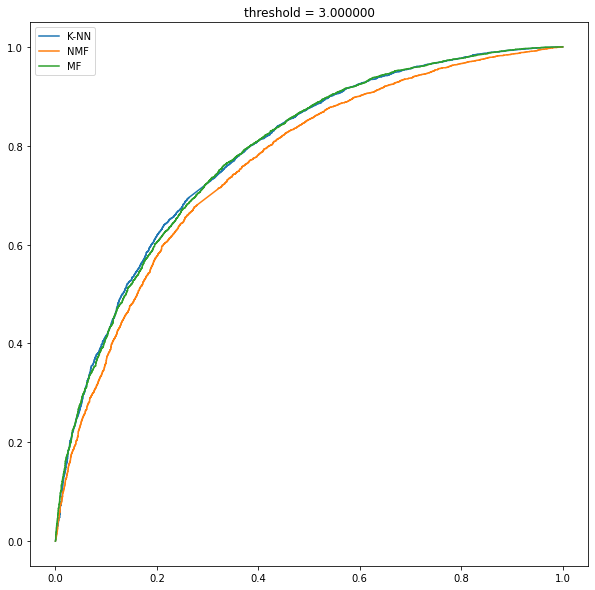

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from surprise import NMF
from surprise import SVD

trainset, testset = train_test_split(Dataset.load_from_df(df[['userId', 'movieId', 'rating']], Reader(rating_scale=(0.5, 5))), test_size=0.1)

t=3
y_label = []
y_score = []
for j in KNNWithMeans(k = kmin11,sim_options={'name':'pearson', "user_based":True}).fit(trainset).test(testset):
  y_score.append(j.est)
  if j.r_ui > t: y_label.append(1)
  else: y_label.append(0)
fpr, tpr, _ = roc_curve(y_label, y_score)
knn_area = roc_auc_score(y_label, y_score)
plt.rcParams["figure.figsize"]=10,10
plt.plot(fpr, tpr)
y_label = []
y_score = []
for j in NMF(n_factors = nnmf_param).fit(trainset).test(testset):
  y_score.append(j.est)
  if j.r_ui > t: y_label.append(1)
  else: y_label.append(0)
fpr, tpr, _ = roc_curve(y_label, y_score)
plt.plot(fpr, tpr)
nmf_area = roc_auc_score(y_label, y_score)
y_label = []
y_score = []
for j in SVD(n_factors = mf_param).fit(trainset).test(testset):
  y_score.append(j.est)
  if j.r_ui > t: y_label.append(1)
  else: y_label.append(0)
fpr, tpr, _ = roc_curve(y_label, y_score)
plt.plot(fpr, tpr)
mf_area = roc_auc_score(y_label, y_score)

plt.title('threshold = %f' % t)
plt.legend(labels = ['K-NN', 
                     'NMF', 
                     'MF'])



In [ ]:
print('knn',knn_area,'nmf', nmf_area,'mf',mf_area) 

knn 0.7892620774200663 nmf 0.7680042848885447 mf 0.7913493027763276


Q36

In [ ]:
def precision_recall(predictions, t, threshold=3):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = {}
    recalls = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rec_k = t
        n_rel_and_rec_k = 0
        for i in range(t):
            if user_ratings[i][1] >= threshold:
                n_rel_and_rec_k += 1
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        precisions[uid] = n_rel_and_rec_k / n_rec_k

        recalls[uid] = n_rel_and_rec_k / n_rel

    return precisions, recalls

In [ ]:
def testset_trim(testset, t, threshold=3):
    count = {}
    likes = {}
    
    for (u, i, r) in testset:
        if u not in count:
            count[u] = 0
        count[u] += 1
        if u not in likes:
            likes[u] = 0
        if r >= threshold:
            likes[u] += 1
    result = []
    for (u, i, r) in testset:
        if count[u] >= t and likes[u] > 0:
            result.append((u, i, r))
    return result

In [ ]:
threshold = 3
ts = [i for i in range(1, 26)]

knn_precision = []
knn_recall = []

for t in ts:
    temp_prec = []
    temp_recall = []

    for trainset, testset in KFold(n_splits=10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
        knn = KNNWithMeans(k=22, sim_options={'name': 'pearson'})
        knn.fit(trainset)
        trimmed_testset = testset_trim(testset, t)
        pred = knn.test(trimmed_testset)
    
        precisions, recalls = precision_recall(pred, t)
        fold_mean_prec = sum(prec for prec in precisions.values()) / len(precisions)
        fold_mean_recall = sum(rec for rec in recalls.values()) / len(recalls)
            
        temp_prec.append(fold_mean_prec)
        temp_recall.append(fold_mean_recall)
    
    t_mean_prec = sum(prec for prec in temp_prec) / len(temp_prec)
    t_mean_recall = sum(rec for rec in temp_recall) / len(temp_recall)
    knn_precision.append(t_mean_prec)
    knn_recall.append(t_mean_recall)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

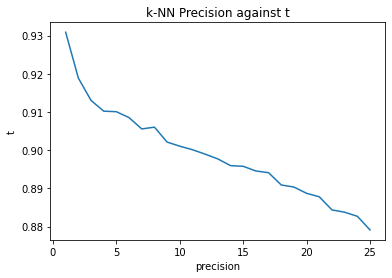

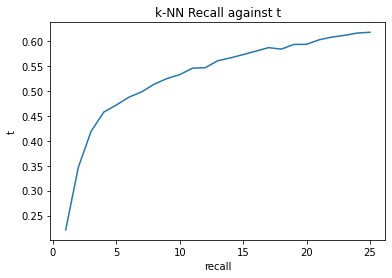

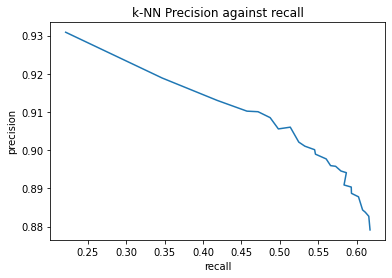

In [ ]:
plt.plot(ts, knn_precision)
plt.xlabel('precision')
plt.ylabel('t')
plt.title('k-NN Precision against t')
plt.show()


plt.plot(ts, knn_recall)
plt.xlabel('recall')
plt.ylabel('t')
plt.title('k-NN Recall against t')
plt.show()

plt.plot(knn_recall, knn_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('k-NN Precision against recall')
plt.show()

Q37

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF

nnmf_precision = []
nnmf_recall = []
for t in ts:
    temp_prec = []
    temp_recall = []

    for trainset, testset in KFold(n_splits=10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
        nmf = NMF(n_factors=18, biased=False)
        nmf.fit(trainset)
        trimmed_testset = testset_trim(testset, t)
        pred = nmf.test(trimmed_testset)
    
        precisions, recalls = precision_recall(pred, t)
        fold_mean_prec = sum(prec for prec in precisions.values()) / len(precisions)
        fold_mean_recall = sum(rec for rec in recalls.values()) / len(recalls)
            
        temp_prec.append(fold_mean_prec)
        temp_recall.append(fold_mean_recall)
    
    t_mean_prec = sum(prec for prec in temp_prec) / len(temp_prec)
    t_mean_recall = sum(rec for rec in temp_recall) / len(temp_recall)
    nnmf_precision.append(t_mean_prec)
    nnmf_recall.append(t_mean_recall)

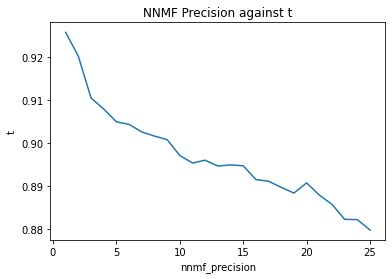

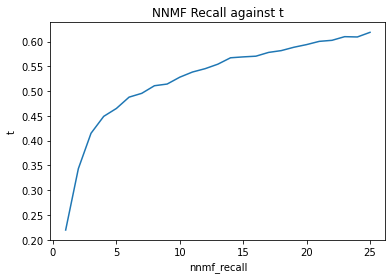

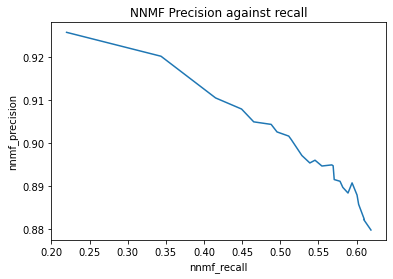

In [ ]:
plt.plot(ts, nnmf_precision)
plt.xlabel('nnmf_precision')
plt.ylabel('t')
plt.title('NNMF Precision against t')
plt.show()


plt.plot(ts, nnmf_recall)
plt.xlabel('nnmf_recall')
plt.ylabel('t')
plt.title('NNMF Recall against t')
plt.show()

plt.plot(nnmf_recall, nnmf_precision)
plt.xlabel('nnmf_recall')
plt.ylabel('nnmf_precision')
plt.title('NNMF Precision against recall')
plt.show()

Q38

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD

mf_precision = []
mf_recall = []

for t in ts:
    temp_prec = []
    temp_recall = []

    for trainset, testset in KFold(n_splits=10).split(Dataset.load_from_df(df[['userId','movieId','rating']], Reader(rating_scale=(0.5, 5)))):
        mf = SVD(n_factors=26, biased=True)
        mf.fit(trainset)
        trimmed_testset = testset_trim(testset, t)
        pred = nmf.test(trimmed_testset)
        precisions, recalls = precision_recall(pred, t)
        fold_mean_prec = sum(prec for prec in precisions.values()) / len(precisions)
        fold_mean_recall = sum(rec for rec in recalls.values()) / len(recalls)
        temp_prec.append(fold_mean_prec)
        temp_recall.append(fold_mean_recall)
    t_mean_prec = sum(prec for prec in temp_prec) / len(temp_prec)
    t_mean_recall = sum(rec for rec in temp_recall) / len(temp_recall)
    mf_precision.append(t_mean_prec)
    mf_recall.append(t_mean_recall)

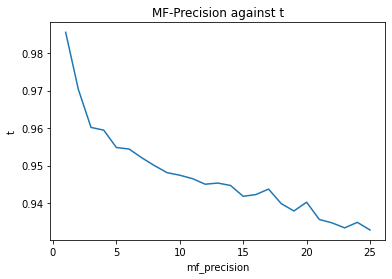

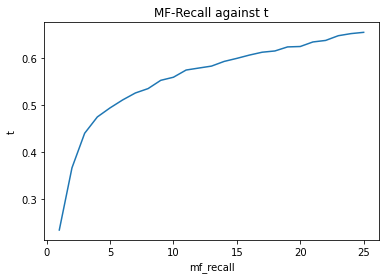

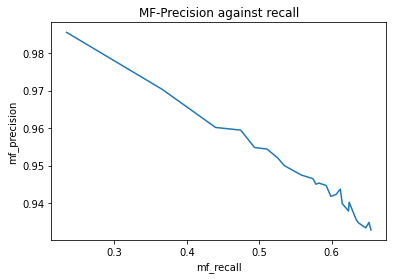

In [ ]:
plt.plot(ts, mf_precision)
plt.xlabel('mf_precision')
plt.ylabel('t')
plt.title('MF-Precision against t')
plt.show()


plt.plot(ts, mf_recall)
plt.xlabel('mf_recall')
plt.ylabel('t')
plt.title('MF-Recall against t')
plt.show()

plt.plot(mf_recall, mf_precision)
plt.xlabel('mf_recall')
plt.ylabel('mf_precision')
plt.title('MF-Precision against recall')
plt.show()

Q39

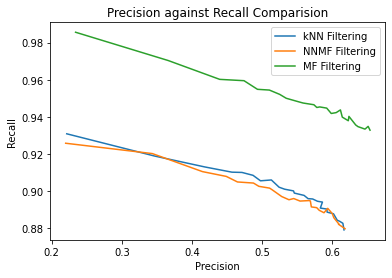

In [ ]:
plt.plot(knn_recall,knn_precision, label='kNN Filtering')
plt.plot(nnmf_recall,nnmf_precision, label='NNMF Filtering')
plt.plot(mf_recall,mf_precision, label='MF Filtering')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision against Recall Comparision')
plt.legend()
plt.show()